### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Reading data
crime = pd.read_csv('/content/crime_data (1).csv')

In [3]:
crime

,cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
def norm_func(i):
  x = (i -i.min())//(i.max()-i.min())
  return(x)

In [6]:
df_norm = norm_func(crime.iloc[:,1:])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

In [8]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# **HIERARCHICAL CLUSTERING**

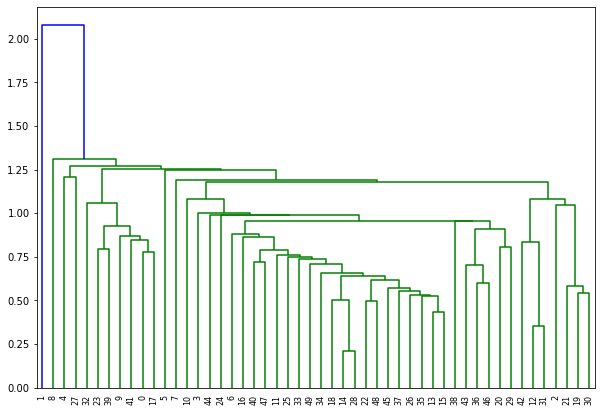

In [9]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_crime,'single'))

In [10]:
hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage ='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [11]:
y_hc = hc.fit_predict(scaled_crime)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [12]:
crime['h_clusterid'] = hc.labels_

In [13]:
crime

,cities,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


# **K-MEANS**

In [14]:
from sklearn.cluster import KMeans

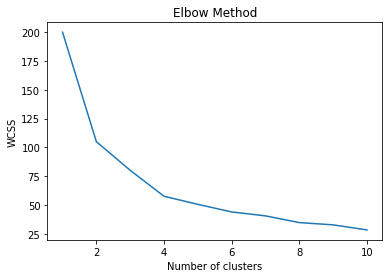

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
        
plt.plot(range(1,11),wcss) 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [17]:
cluster_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [18]:
crime['clusterid_new'] = cluster_new.labels_

In [19]:
cluster_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [20]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,0.000000
1,1,13.937500,243.625000,53.750000,21.412500,0.000000
2,2,10.815385,257.384615,76.000000,33.192308,0.230769
3,3,3.600000,78.538462,52.076923,12.176923,0.000000


In [21]:
crime

,cities,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,1,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,2
9,Georgia,17.4,211,60,25.8,0,1


In [22]:
crime[crime['clusterid_new']==2]

,cities,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
1,Alaska,10.0,263,48,44.5,1,2
2,Arizona,8.1,294,80,31.0,0,2
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
8,Florida,15.4,335,80,31.9,2,2
12,Illinois,10.4,249,83,24.0,0,2
19,Maryland,11.3,300,67,27.8,0,2
21,Michigan,12.1,255,74,35.1,0,2
24,Missouri,9.0,178,70,28.2,0,2
27,Nevada,12.2,252,81,46.0,0,2


# **DBSCAN**

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
crime_df= crime.iloc[:,1:]

In [25]:
array = crime_df.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ,   3. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ,   3. ],
       [ 11.3, 300. ,  67. ,  2

In [26]:
scaler =StandardScaler().fit(array)
X = scaler.transform(array)

In [27]:
X

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03, -1.93246988e-01, -3.87609867e-01],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  3.02753614e+00,  4.55020278e-01],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00, -1.93246988e-01,  4.55020278e-01],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -1.93246988e-01, -3.87609867e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00, -1.93246988e-01,  4.55020278e-01],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00, -1.93246988e-01,  4.55020278e-01],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -1.93246988e-01, -1.23024001e+00],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01, -1.93246988e-01, -1.23024001e+00],
       [ 1.76541475e+00,  1.99078607e+00,  1.009

In [28]:
dbscan = DBSCAN(eps=1.5, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1.5, min_samples=8)

In [29]:
dbscan.labels_

array([-1, -1,  0,  1,  0,  0,  1,  1, -1, -1,  1,  2,  0,  1,  2,  1,  2,
       -1,  2,  0,  1,  0,  2, -1,  0,  2,  2,  0,  2,  1,  0,  0, -1,  2,
        1,  1,  1,  1,  1, -1,  2, -1,  0,  1,  2,  1,  1,  2,  2,  1])

In [30]:
cl = pd.DataFrame(dbscan.labels_,columns=['clusters'])
cl

,clusters
0,-1
1,-1
2,0
3,1
4,0
5,0
6,1
7,1
8,-1
9,-1


In [31]:
clustered = pd.concat([crime,cl],axis=1)

In [32]:
clustered[clustered['clusters']==1]

,cities,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters
3,Arkansas,8.8,190,50,19.5,0,1,1
6,Connecticut,3.3,110,77,11.1,0,0,1
7,Delaware,5.9,238,72,15.8,0,0,1
10,Hawaii,5.3,46,83,20.2,0,0,1
13,Indiana,7.2,113,65,21.0,0,0,1
15,Kansas,6.0,115,66,18.0,0,0,1
20,Massachusetts,4.4,149,85,16.3,0,0,1
29,New Jersey,7.4,159,89,18.8,0,0,1
34,Ohio,7.3,120,75,21.4,0,0,1
35,Oklahoma,6.6,151,68,20.0,0,0,1


In [33]:
clustered

,cities,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,1,2,-1
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,0,1,1
4,California,9.0,276,91,40.6,0,2,0
5,Colorado,7.9,204,78,38.7,0,2,0
6,Connecticut,3.3,110,77,11.1,0,0,1
7,Delaware,5.9,238,72,15.8,0,0,1
8,Florida,15.4,335,80,31.9,2,2,-1
9,Georgia,17.4,211,60,25.8,0,1,-1


In [34]:
clustered.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder             7.788
Assault          170.760
UrbanPop          65.540
Rape              21.232
h_clusterid        0.060
clusterid_new      1.460
clusters           0.680
dtype: float64

# **K-MEANS ++**

In [35]:
#loading libraries
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus

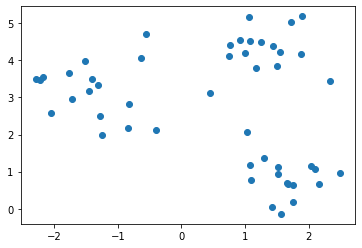

In [36]:
#creating blobs
X, y = make_blobs(n_samples=49, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

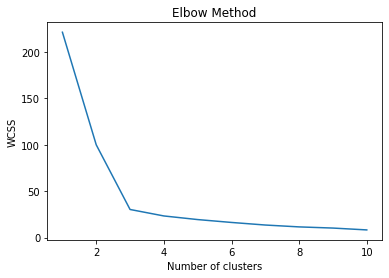

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

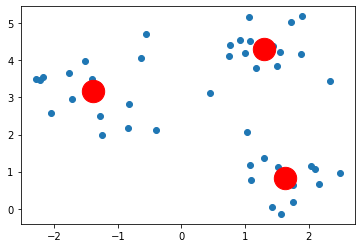

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='red')
plt.show()

# **KMEDOIDS**

In [39]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 23.8 MB/s 


In [40]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


In [46]:
kmedoids = KMedoids(n_clusters=3).fit(X)

In [47]:
labels = kmedoids.labels_
labels

array([1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       0, 0, 1, 0, 2])

In [48]:
centres = kmedoids.cluster_centers_
centres

array([[-1.45075676,  3.15907588],
       [ 1.67467427,  0.68001896],
       [ 1.24258802,  4.50399192]])

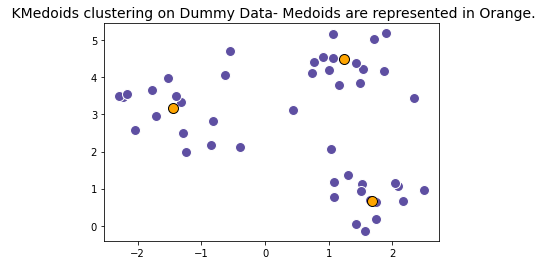

In [50]:
unq_lab = set(labels)
# Setting Up Color Codes
colors_plot = [
 plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))
]
for k, col in zip(unq_lab, colors_plot):
  labels == k

xy = X
 
 #Plotting Feature X and Feature Y for each cluster labels
 
plt.plot(
 xy[:, 0],
 xy[:, 1],
 "o",
 markerfacecolor=tuple(col),
 markeredgecolor= "white",
 markersize=10,
);

#Annotate Centroids
plt.plot(
 kmedoids.cluster_centers_[:, 0],
 kmedoids.cluster_centers_[:, 1],
 'o',
 markerfacecolor= "orange",
 markeredgecolor= "k",
 markersize=10,
);

#Add title to the plot

plt.title(" KMedoids clustering on Dummy Data- Medoids are represented in Orange.", fontsize=14);